# Skin Cancer Image Classification

### Este modelo utiliza a arquitetura Vision Transformer (ViT) para classificar imagens de lesões de pele em várias categorias, incluindo melanoma, carcinoma basocelular, entre outras.

#### Para começar, devemos instalar as bibliotecas utilizadas:

In [54]:
!pip install transformers torch torchvision Pillow --user

#### Agora, vamos importar as bibliotecas instaladas:

In [55]:
import torch
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import matplotlib.pyplot as plt

#### Definimos agora o nome das funções a serem utilizadas:

In [56]:
model_name = "Anwarkh1/Skin_Cancer-Image_Classification"
processor = ViTImageProcessor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name)

#### Abaixo, vemos a lista com as lesões que categorizadas:

In [57]:
classes = [
    "benign keratosis-like lesions",
    "basal cell carcinoma",
    "actinic keratoses",
    "vascular lesions",
    "melanocytic nevi",
    "melanoma",
    "dermatofibroma"
]

#### Abaixo, temos a função que será utilizada para retornar o pré-diagnóstico da lesão:

In [58]:
def predict_image(image_path):
    image = Image.open(image_path)
    inputs = processor(images=image, return_tensors="pt")
    
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=1).item()
    
    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    plt.title(f"Predição: {classes[predicted_class]}")
    plt.axis('off')
    plt.show()
    
    probabilities = torch.nn.functional.softmax(logits, dim=1)[0]
    return {classes[i]: float(probabilities[i]) for i in range(len(classes))}

### Actinic Keratosis

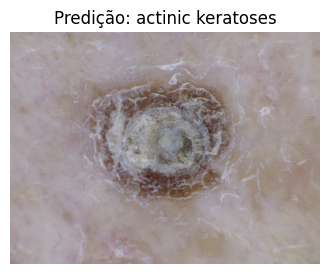


Probabilidades para cada classe:
actinic keratoses: 53.42%
benign keratosis-like lesions: 43.35%
melanoma: 1.62%
basal cell carcinoma: 0.55%
vascular lesions: 0.49%
dermatofibroma: 0.30%
melanocytic nevi: 0.27%


In [59]:
image_path = "./imagens-scic/actinic-keratosis.jpg"

probabilities = predict_image(image_path)

print("\nProbabilidades para cada classe:")
for class_name, prob in sorted(probabilities.items(), key=lambda x: x[1], reverse=True):
    print(f"{class_name}: {prob:.2%}")


### Vascular Lesion

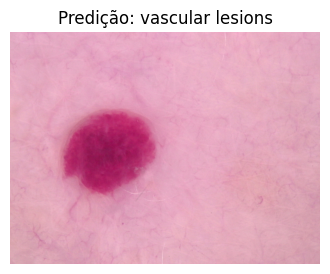


Probabilidades para cada classe:
vascular lesions: 98.96%
melanocytic nevi: 0.65%
dermatofibroma: 0.11%
melanoma: 0.07%
benign keratosis-like lesions: 0.07%
basal cell carcinoma: 0.07%
actinic keratoses: 0.06%


In [60]:
image_path = "./imagens-scic/vascular-lesion.jpg"

probabilities = predict_image(image_path)

print("\nProbabilidades para cada classe:")
for class_name, prob in sorted(probabilities.items(), key=lambda x: x[1], reverse=True):
    print(f"{class_name}: {prob:.2%}")

### Melanoma

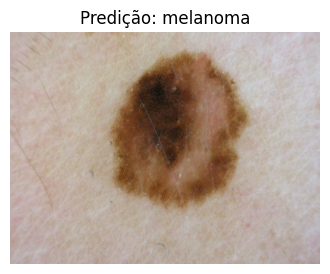


Probabilidades para cada classe:
melanoma: 91.73%
melanocytic nevi: 8.03%
benign keratosis-like lesions: 0.10%
dermatofibroma: 0.05%
actinic keratoses: 0.04%
basal cell carcinoma: 0.03%
vascular lesions: 0.02%


In [61]:
image_path = "./imagens-scic/melanoma.jpg"

probabilities = predict_image(image_path)

print("\nProbabilidades para cada classe:")
for class_name, prob in sorted(probabilities.items(), key=lambda x: x[1], reverse=True):
    print(f"{class_name}: {prob:.2%}")

### Melanocytic Nevus

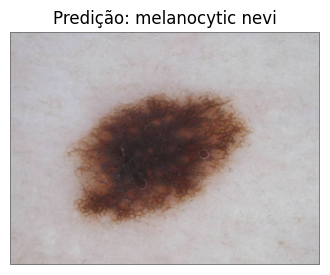


Probabilidades para cada classe:
melanocytic nevi: 99.91%
melanoma: 0.05%
basal cell carcinoma: 0.01%
benign keratosis-like lesions: 0.01%
dermatofibroma: 0.01%
actinic keratoses: 0.01%
vascular lesions: 0.01%


In [62]:
image_path = "./imagens-scic/melanocytic-nevus.jpg"

probabilities = predict_image(image_path)

print("\nProbabilidades para cada classe:")
for class_name, prob in sorted(probabilities.items(), key=lambda x: x[1], reverse=True):
    print(f"{class_name}: {prob:.2%}")

### Dermatofibrona

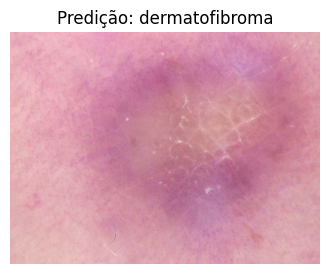


Probabilidades para cada classe:
dermatofibroma: 99.09%
melanocytic nevi: 0.26%
vascular lesions: 0.20%
actinic keratoses: 0.19%
melanoma: 0.10%
basal cell carcinoma: 0.09%
benign keratosis-like lesions: 0.07%


In [63]:
image_path = "./imagens-scic/dermatofibrona.jpg"

probabilities = predict_image(image_path)

print("\nProbabilidades para cada classe:")
for class_name, prob in sorted(probabilities.items(), key=lambda x: x[1], reverse=True):
    print(f"{class_name}: {prob:.2%}")

### Benign Keratosis

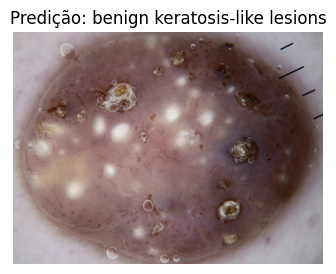


Probabilidades para cada classe:
benign keratosis-like lesions: 98.14%
melanocytic nevi: 0.91%
actinic keratoses: 0.44%
dermatofibroma: 0.27%
vascular lesions: 0.12%
melanoma: 0.07%
basal cell carcinoma: 0.05%


In [64]:
image_path = "./imagens-scic/benign-keratosis.jpg"

probabilities = predict_image(image_path)

print("\nProbabilidades para cada classe:")
for class_name, prob in sorted(probabilities.items(), key=lambda x: x[1], reverse=True):
    print(f"{class_name}: {prob:.2%}")

### Carcinoma

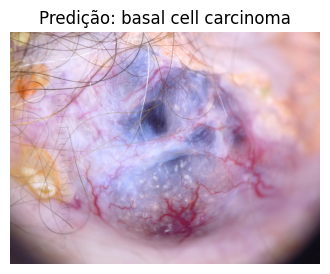


Probabilidades para cada classe:
basal cell carcinoma: 98.01%
actinic keratoses: 0.79%
benign keratosis-like lesions: 0.51%
melanocytic nevi: 0.39%
melanoma: 0.20%
vascular lesions: 0.05%
dermatofibroma: 0.05%


In [65]:
image_path = "./imagens-scic/carcinoma.jpg"

probabilities = predict_image(image_path)

print("\nProbabilidades para cada classe:")
for class_name, prob in sorted(probabilities.items(), key=lambda x: x[1], reverse=True):
    print(f"{class_name}: {prob:.2%}")